In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [17]:
N = 256
p = 5e-6
wavelength = 500e-9
k = 2*math.pi/wavelength
z = 0.1
f0 = 1/(wavelength * math.sqrt(1+(2*z/(N*p))**2))

In [18]:
x,y = np.meshgrid(np.linspace(-127.5,127.5,256), np.linspace(-127.5,127.5,256))
fx,fy = np.meshgrid(np.linspace(-0.5,0.5-1/256,256), np.linspace(-0.5,0.5-1/256,256))

x *= p
y *= p
fx /= p
fy /= p

In [19]:
a = (abs(x) <= 50*p) * (abs(y) <= 50*p)

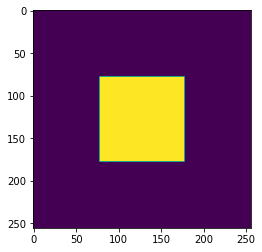

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(a)

In [25]:
LP = (abs(fx) <= np.sqrt(f0**2 - fy**2)) * (abs(fy) <= np.sqrt(f0**2 - fx**2))

C:\Users\lenovo\AppData\Local\Temp\ipykernel_27480\1269121317.py:1: RuntimeWarning: invalid value encountered in sqrt
  LP = (abs(fx) <= np.sqrt(f0**2 - fy**2)) * (abs(fy) <= np.sqrt(f0**2 - fx**2))


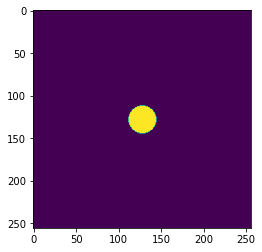

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(LP)

In [27]:
A = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(a)))
alpha = np.sqrt(k**2 - 4*math.pi**2 *(fx**2+fy**2))
H = np.exp(1j*alpha*z)
a1 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(A*H*LP)))

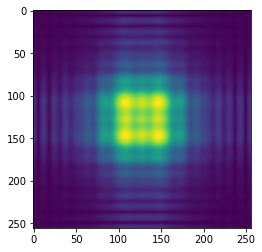

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(np.abs(a1))